### 排错集锦
##### CondaError: Run 'conda init' before 'conda activate'

```shell
$ conda activate ML
CondaError: Run 'conda init' before 'conda activate'

$ source activate
(base) 

$ conda activate ML
(ML) 
```

好像是`windows`上的问题，使用`activate`之前要`source activate`一次

##### 导入matplotlib时报DLL load fail的错误

```shell
from . import _imaging as core
ImportError: DLL load failed while importing _imaging: The specified module could not be found
```

* `pillow`版本问题，重新安装更低版本的`pillow`:

```shell
conda uninstall pillow
conda ### 安装pytorch
可以到`pytorch`官网查看安装命令  [link](https://pytorch.org/get-started/locally/)
安装`pytorch`的同时会安装`cuda`，因为`pytorch`会调用`cuda`利用`gpu`进行计算
安装`cuda`时要注意适配版本install pillow==8.0.0
```



### Lecture02 Linear Model

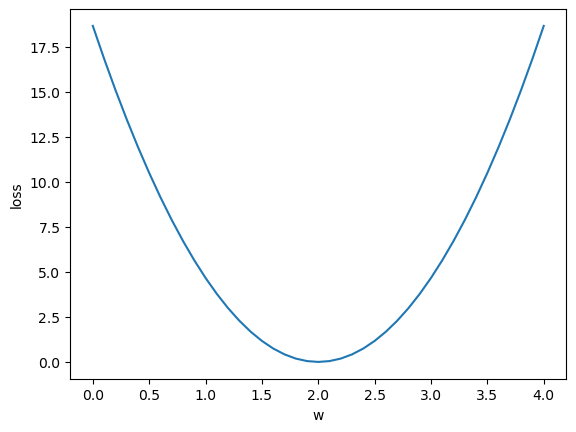

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = [1 , 2 , 3]
y = [2 , 4 , 6]

def forward(w , x):
    return w * x

def loss(w , x , y):
    y_pred = w * x

    return (y_pred - y) ** 2


w_list = []
loss_list = []
for w in np.arange(0 , 4.1 , 0.1):

    loss_sum = 0
    w_list.append(w)

    for _x , _y  in zip(x , y):
        loss_sum += loss(w , _x , _y)

    loss_list.append(loss_sum / len(x))

plt.plot(w_list , loss_list)
plt.ylabel('loss')
plt.xlabel('w')
plt.show()

### Lecture03 Gradient descend

梯度下降：$w = w - \alpha * \frac{\partial cost(w)}{\partial w}$ , $\frac{\partial cost(w)}{\partial w} = \frac{1}{N} \sum_{n=1}^{N} 2 * x_n * (w * x_n - y_n)$

In [3]:
import matplotlib.pyplot as plt

x = [1 , 2 , 3]
y = [2 , 4 , 6]

def forward(w , x):
    return w * x

def cost(w , x_s , y_s):
    cost = 0
    for _x , _y in zip(x,y):
        y_pred = forward(w , _x)
        cost += (y_pred - _y) ** 2
    
    return cost / len(x_s)

def gradient(w , x_s , y_s):
    
    grad = 0
    for _x , _y in zip(x,y):
        grad += 2 * _x * (w * _x - _y)
    
    grad /= len(x_s)
    return grad

w = 0
a = 0.1 # 学习率

for epoch in range(0 , 100):
    
    cost_val = cost(w , x , y)
    grad = gradient(w , x , y)
    w -= a * grad


print('w = ' , w)

w =  2.0


**随机梯度下降：**
对每一个数求梯度
$w = w - \alpha * \frac{\partial loss}{\partial w}$ , $\frac{\partial loss_n}{\partial w} = 2 * x_n * (w * x_n - y_n)$

In [4]:
x = [1 , 2 , 3]
y = [2 , 4 , 6]

def forward(w , x):
    return w * x


def gradient(w , _x , _y):
    y_pred = forward(w , _x)
    return 2 * _x * (w * _x - _y)



a = 0.1 #学习率
w = 0
for epoch in range(100):
    for _x , _y in zip(x , y):
        grad = gradient(w , _x , _y)
        w -= a * grad

print('w = ' , w)

w =  2.0


### Back Propagation

In [ ]:
import torch
x_data = [1 , 2 , 3]
y_data = [2 , 4 , 6]

w = torch.tensor([1.0] , requires_grad = True)

def forward(x):
    return w * x

def loss(x , y):
    y_pred = w * x
    return (y_pred - y) ** 2


print("Predict (before training)" , 4 , forward(4).item())

for epoch in range(100):
    for x , y  in zip(x_data , y_data):
        l = loss(x , y)
        l.backward() #梯度存在对应的变量(权重)w中,具体来说是w.grad.data中

        print("\tgrad:" , x , y , w.grad.item() , w.data) # .item()是标量
        w.data = w.data - 0.01 * w.grad.data #w.data是w的值，w.grad.data是w梯度的值

        w.grad.data.zero_() #每次需要将w.grad.data置零，因为pytorch会默认将权重梯度累加

    print("Progress: " , epoch , l.item())

# print(type(w) , type(w.grad) , type(w.data) , type(w.grad.data) , type(w.grad.item()))
# print(w , w.grad , w.data , w.grad.data , w.grad.item() )
print("Predict(after training): " , 4 , forward(4).item())

In [29]:
import torch

x_data = [1 , 2 , 3]
y_data = [2 , 4 , 6]

def forward(w , x):
    return w * x

def loss(w , x , y):
    y_pred = w * x
    return (y_pred - y) ** 2

w = torch.tensor([1.0] , requires_grad = True)

for epoch in range(100):
    for x , y in zip(x_data , y_data):
        l = loss(w , x , y)
        l.backward()
        w.data -= 0.01 * w.grad.data

        w.grad.data.zero_()

print(w.data.item())

1.9999996423721313


预测$y = w_1x^2 + w_2x + 3$

$x_{data} = [1 , 2 , 3]$ 

$y_{data} = [6 , 11 , 18]$

In [27]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x_data = torch.tensor([1 , 2 , 3 , 5 , 6 , 7] , device=device)
y_data = torch.tensor([6 , 11 , 19 , 38 , 51 , 66] , device=device) 

w1 = torch.tensor([0.] , requires_grad = True , device=device)
w2 = torch.tensor([0.] , requires_grad = True , device=device)
a  = 0.0001
turns = 10000

def forward(w1 , w2 , x):
    y_pred = w1 * x ** 2 + w2 * x + 3
    return y_pred.to(device)

def loss(w1 , w2 , x , y):
    y_pred = forward(w1 , w2 , x)
    return (y_pred - y) ** 2

for epoch in range(turns):
    for x , y in zip(x_data , y_data):
        l = loss(w1 , w2 , x , y)

        l.backward()

        w1.data -= a * w1.grad.data
        w2.data -= a * w2.grad.data

        w1.grad.data.zero_()
        w2.grad.data.zero_()
    
    
print(f' device = {device} , w1 = {w1.data.item()} , w2 = {w2.data.item()} , forward(4) = {forward(w1 , w2 , 4).data.item()}')



 device = cuda:0 , w1 = 0.9676660299301147 , w2 = 2.216028928756714 , forward(4) = 27.346771240234375


### pytorch 实现线性回归
* 准备数据
* 设计model类
* 构造损失函数和优化器
* 循环训练

In [45]:
import torch


x_data = torch.tensor([[1] , [2] , [3]] , dtype=torch.float32)
y_data = torch.tensor([[2] , [4] , [6]] , dtype=torch.float32)#显式声明数据类型，避免类型自动推导产生数据类型不匹配的错误

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel , self).__init__()
        self.linear = torch.nn.Linear(1 , 1)

    def forward(self , x):
        y_pred = self.linear(x)
        return y_pred
    

model = LinearModel()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

for epoch in range(1000):
    y_pred = model(x_data) #model内定义了__call__ , model(x_data)调用的是forward()
    loss = criterion(y_pred , y_data)
    if epoch % 100 == 0:
        print(epoch , loss.item())

    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() 

print("w = " , model.linear.weight.item())   
print("b = " , model.linear.bias.item())


x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print("y_pred = " , y_test.data.item())


d:\software\anaconda3\envs\ML\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 95.7431640625
100 0.029077215120196342
200 0.006837148219347
300 0.001607678015716374
400 0.0003780184779316187
500 8.889101445674896e-05
600 2.0899517039651982e-05
700 4.914240889775101e-06
800 1.1555289347597864e-06
900 2.7161559046362527e-07
w =  1.9998303651809692
b =  0.00038553617196157575
y_pred =  7.999707221984863
